# Проект 8. Сбореый_проект_2. Добыча золота.

<div class="alert alert-block alert-info">
Добрый день reviewer_name. До ЯП от области IT я был достаточно далёк - поэтому в коде вероятно есть "детские" ошибки. В связи с тем что в процессе обучения календарь (график обучения) нашей когорты был сдвинут на 1 неделю вперед, а я успел запланировать отпуск, пришлось заранее выпросить задание проекта и получилось позаниматься им раньше других. Часть инструментов используемых мной пробую впервые. Заранее благодарю за ревью. 

## Содержание

    1  Содержание
    2  Описание проекта и постановка задачи.
        2.1  Описание данных.
        2.2  Таблица имен DataFrame
    3  Загрузка и подготовка данных
        3.1  Импорт библиотек
        3.2  Загрузка данных
        3.3  Изучение данных
        3.4  Проверка правильности расчета rougher.output.recovery
        3.5  Проверка правильности расчета final.output.recovery
        3.6  Анализ признаков, недоступных в тестовой выборке.
        3.7  Выводы по данным
    4  Подготовка данных
        4.1  Тип данных
        4.2  Замена пропусков интерполяцией
        4.3  Замена пропусков нулями
        4.4  Удаление пропусков
    5  Анализ данных
        5.1  Сравнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки
            5.1.1  Золото
            5.1.2  Серебро
            5.1.3  Свинец
        5.2  Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках
        5.3  Исследование суммарных концентраций веществ на разных стадиях
    6  Удаление выбросов
        6.1  В тренировочных данных
            6.1.1  Не удаляем
            6.1.2  Удаляем строки с концентрацией < 0.05
        6.2  В тестовых данных ????
            6.2.1  Удаляем NaN
            6.2.2  Заполняем NaN нулями
            6.2.3  Удаляем строки с концентрацией во входящем сырье < 0.05 и заполняем NaN интерполяцией
        6.3  Выбор и масштабирование признаков
    7  Функция для вычисления sMAPE
    8  Обучение и проверка модели
        8.1  Линейная регрессия
        8.2  Дерево решений
        8.3  Случайный лес
        8.4  DummyRegressor
        8.5  Сравнение моделей
    9  Проверка на тестовой выборке
    10  Выводы

## Описание проекта и постановка задачи.

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Вам нужно:
* Подготовить данные;
* Провести исследовательский анализ данных;
* Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.
Следующий урок посвящён технологическому процессу очистки руды.
Решите сами, какие детали нужны для построения модели, а какие — нет.

### Описание данных.

Данные находятся в трёх файлах:
* gold_recovery_train.csv — обучающая выборка;
* gold_recovery_test.csv — тестовая выборка;
* gold_recovery_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date).  
Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

<a name="DataFrame_names"></a>
### Таблица имен DataFrame

В проекте используются следующие имена для DataFrame:



Этап загрузки | Этап замены NaN | Этап удаления выбросов | Количество строк | Доля потерь
--- |--- | --- | --- | ---
 | | | |
data_train | data_train_int | data_train_int_nodrop | 16 860 |
 | | data_train_int_drop2 | 15 418 | (-8.6%)
 | | | |
 | data_train_fillna0 | data_train_fillna0_nodrop | 16 860 |
 | | data_train_fillna0_drop2 | 15 405 | (-8.6%)
 | | | |
 | data_train_dropNA | data_train_dropNA_nodrop | 11 017 | (-34.7%)
 |  | data_train_dropNA_drop2 | 11 017 | (-34.7%)
 --- |--- | --- | --- | ---
data_test | | | 5 856 |

## Загрузка и подготовка данных
1.1. Откройте файлы и изучите их.
Путь к файлам:
* /datasets/gold_recovery_train.csv.
* /datasets/gold_recovery_test.csv.
* /datasets/gold_recovery_full.csv.  

1.2. Проверьте, что эффективность обогащения рассчитана правильно.
Вычислите её на обучающей выборке для признака rougher.output.recovery.
Найдите MAE между вашими расчётами и значением признака. Опишите
выводы.  
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это
за параметры? К какому типу относятся?  
1.4. Проведите предобработку данных.

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#from scipy import stats as st

from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score #, train_test_split
from sklearn.tree import DecisionTreeRegressor #,DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor #RandomForestClassifier
from sklearn.linear_model import LinearRegression #,LogisticRegression 
from sklearn.dummy import DummyRegressor#, DummyClassifier
from sklearn.metrics import mean_absolute_error, make_scorer #, mean_squared_error, r2_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score


### Загрузка данных

In [2]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

### Изучение данных

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(data_train.sample(3).T)
#display(data_test.sample(3))
#display(data_full.sample(3))

,9939,5850,13901
date,2017-07-04 02:59:59,2017-01-14 17:59:59,2018-04-17 04:59:59
final.output.concentrate_ag,3.4409,0,5.63519
final.output.concentrate_pb,9.90126,0,8.64796
final.output.concentrate_sol,8.10889,0,7.85479
final.output.concentrate_au,48.2737,0,46.8532
final.output.recovery,66.2147,NaN,69.6025
final.output.tail_ag,8.05744,0,12.8272
final.output.tail_pb,3.01376,0,1.85161
final.output.tail_sol,11.1059,0,5.32683
final.output.tail_au,2.69657,0,2.12929


In [4]:
#data_train.info()
#data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [5]:
#переименуем названия столбцов
for df in [data_train, data_test, data_full]:
    columns=df.columns
    columns1 = [row.replace('.', '_') for row in columns]
    columns2 = [row.replace('primary_cleaner', '1cl') for row in columns1]
    columns3 = [row.replace('rougher', '0cl') for row in columns2]
    columns4 = [row.replace('secondary_cleaner', '2cl') for row in columns3]
    columns5 = [row.replace('floatbank', 'fb') for row in columns4]
    columns6 = [row.replace('concentrate', 'con') for row in columns5]
    columns7 = [row.replace('input', 'in') for row in columns6]
    columns8 = [row.replace('output', 'out') for row in columns7]
    columns9 = [row.replace('state', 'st') for row in columns8]
    columns10 = [row.replace('calculation', 'calc') for row in columns9]
    df.set_axis(columns10, axis='columns', inplace=True)
#data_train.info()

In [6]:
#признаки "полезной" концентрации металлов на разных этапах
au_con = ['0cl_in_feed_au', '0cl_out_con_au', '1cl_out_con_au', 'final_out_con_au']
ag_con = ['0cl_in_feed_ag', '0cl_out_con_ag', '1cl_out_con_ag', 'final_out_con_ag']
pb_con = ['0cl_in_feed_pb', '0cl_out_con_pb', '1cl_out_con_pb', 'final_out_con_pb']
legend = ['сырьё', 'после флотации', 'после первичной очистки', 'после вторичной очистки']
#признаки концентрации в "хвостах" на разных этапах
au_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
ag_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
pb_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
legend_tail = ['после флотации', 'после первичной очистки', 'после вторичной очистки', 'финальные хвосты']

### Проверка правильности расчета rougher.output.recovery

In [7]:
#вынесем необходимые данные в отдельный df
data_MAE = data_train.loc[:, ['0cl_out_recovery', '0cl_out_con_au', '0cl_in_feed_au', '0cl_out_tail_au']]

_c1 = data_MAE['0cl_out_con_au']
_f1 = data_MAE['0cl_in_feed_au']
_t1 = data_MAE['0cl_out_tail_au']
data_MAE['0cl_out_recovery_2'] = _c1*(_f1-_t1)/(_f1*(_c1-_t1))*100

data_MAE.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE.dropna(subset=['0cl_out_recovery_2'], inplace=True) 
print()
data_MAE.info()

print('Нет первоначального расчета rougher.output.recovery')
display(data_MAE[data_MAE['0cl_out_recovery']!=data_MAE['0cl_out_recovery']].sample(5).T)

data_MAE.dropna(inplace=True)

display(data_MAE.loc[:, ['0cl_out_recovery', '0cl_out_recovery_2']].sample(5).T)
MAE = mean_absolute_error(data_MAE['0cl_out_recovery'], data_MAE['0cl_out_recovery_2'])
print(MAE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
0cl_out_recovery      14287 non-null float64
0cl_out_con_au        16778 non-null float64
0cl_in_feed_au        16777 non-null float64
0cl_out_tail_au       14611 non-null float64
0cl_out_recovery_2    14577 non-null float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 16859
Data columns (total 5 columns):
0cl_out_recovery      14287 non-null float64
0cl_out_con_au        14577 non-null float64
0cl_in_feed_au        14577 non-null float64
0cl_out_tail_au       14577 non-null float64
0cl_out_recovery_2    14577 non-null float64
dtypes: float64(5)
memory usage: 683.3 KB
Нет первоначального расчета rougher.output.recovery


,8627,15632,7850,16326,9225
0cl_out_recovery,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,21.930976,0.010000,5.275005,0.010000,0.163636
0cl_in_feed_au,4.131633,9.081602,6.840172,8.552027,8.644782
0cl_out_tail_au,4.418794,1.566207,0.956113,1.677022,2.315261
0cl_out_recovery_2,-8.704029,-0.531768,105.065591,-0.482239,-5.568374


,8375,16740,14233,3776,7206
0cl_out_recovery,80.534223,92.847961,91.626293,72.348255,99.024954
0cl_out_recovery_2,80.534223,92.847961,91.626293,72.348255,99.024954


9.444891926100695e-15


### Проверка правильности расчета final.output.recovery

In [8]:
#вынесем необходимые данные в отдельный df
data_MAE_2 = data_train.loc[:, ['final_out_recovery', 'final_out_con_au', '0cl_in_feed_au', 'final_out_tail_au']]

_c2 = data_MAE_2['final_out_con_au'] 
_f2 = data_MAE_2['0cl_in_feed_au']
_t2 = data_MAE_2['final_out_tail_au']
data_MAE_2['final_out_recovery_2'] = _c2*(_f2-_t2)/(_f2*(_c2-_t2))*100

data_MAE_2.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE_2.dropna(subset=['final_out_recovery_2'], inplace=True) 
print()
data_MAE_2.info()

print('Нет первоначального расчета final_out_recovery')
display(data_MAE_2[data_MAE_2['final_out_recovery']!=data_MAE_2['final_out_recovery']].sample(5).T)

data_MAE_2.dropna(inplace=True)

display(data_MAE_2.loc[:, ['final_out_recovery', 'final_out_recovery_2']].sample(5).T)
MAE_2 = mean_absolute_error(data_MAE_2['final_out_recovery'], data_MAE_2['final_out_recovery_2'])
print(MAE_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
final_out_recovery      15339 non-null float64
final_out_con_au        16789 non-null float64
0cl_in_feed_au          16777 non-null float64
final_out_tail_au       16794 non-null float64
final_out_recovery_2    15582 non-null float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15582 entries, 0 to 16859
Data columns (total 5 columns):
final_out_recovery      15339 non-null float64
final_out_con_au        15582 non-null float64
0cl_in_feed_au          15582 non-null float64
final_out_tail_au       15582 non-null float64
final_out_recovery_2    15582 non-null float64
dtypes: float64(5)
memory usage: 730.4 KB
Нет первоначального расчета final_out_recovery


,14272,433,1266,2414,3047
final_out_recovery,NaN,NaN,NaN,NaN,NaN
final_out_con_au,49.400415,35.686803,40.434038,37.937991,14.620255
0cl_in_feed_au,0.239341,6.484205,1.970067,4.623858,0.000000
final_out_tail_au,1.010667,6.693746,3.266619,5.248643,1.581447
final_out_recovery_2,-329.002118,-3.977653,-71.596799,-15.681739,-inf


,14444,3698,1013,15179,15480
final_out_recovery,73.152444,70.800956,72.203529,68.51174,79.2711
final_out_recovery_2,73.152444,70.800956,72.203529,68.51174,79.2711


8.158251945945868e-15


In [9]:
#Посмотрим на низкие значения концентрации на разных этапах
display(data_train[data_train['0cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['1cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['final_out_con_au']<2][au_con].sample(15).T)

,2579,1804,2026,4127,1797,12255,5875,16024,7579,2075,12323,7518,12588,8100,13472
0cl_in_feed_au,0.0,0.0,0.0,0.0,0.0,12.433451,0.0,6.371596,0.0,7.078153,8.639433,0.0,0.01,0.000000,0.01
0cl_out_con_au,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.010000,0.0,0.000000,0.000000,0.0,0.01,0.000000,0.01
1cl_out_con_au,0.0,0.0,0.0,0.0,0.0,31.806635,0.0,25.630426,0.0,34.261161,42.628299,0.0,0.01,0.000000,0.01
final_out_con_au,0.0,0.0,0.0,0.0,0.0,44.487885,0.0,46.923911,0.0,43.384395,49.403479,0.0,0.01,3.768342,0.01


,16639,16500,11577,8653,3048,5388,14276,2583,4126,15584,813,16212,2581,2328,13508
0cl_in_feed_au,7.560704,0.01,0.0,0.0,0.0,0.0,0.761151,0.0,0.0,4.060212,0.255631,0.01,0.0,1.033221,0.01
0cl_out_con_au,20.738483,0.01,0.0,0.0,0.0,0.0,16.917793,0.0,0.0,11.363451,15.543751,0.01,0.0,0.570819,0.01
1cl_out_con_au,0.010000,0.01,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.010000,0.000000,0.01,0.0,0.713426,0.01
final_out_con_au,45.881426,0.01,0.0,0.0,0.0,0.0,46.489701,0.0,0.0,37.012913,38.920218,0.01,0.0,7.148353,0.01


,7540,16252,5905,12036,11557,12024,13522,6927,1986,4942,11466,4079,13506,8736,13475
0cl_in_feed_au,0.0,0.01,0.0,0.0,0.0,0.0,0.01,9.844394,0.0,0.0,0.0,0.0,0.01,0.0,0.01
0cl_out_con_au,0.0,0.01,0.0,0.0,0.0,0.0,0.01,24.621715,0.0,0.0,0.0,0.0,0.01,0.0,0.01
1cl_out_con_au,0.0,0.01,0.0,0.0,0.0,0.0,0.01,36.979106,0.0,0.0,0.0,0.0,0.01,0.0,0.01
final_out_con_au,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.01,0.0,0.01


Расчет rougher.output.recovery и final.output.recovery в исходных данных произведен правильно, но есть строки с отсутствующими значениями которые можно "досчитать" после заполнения ошибок (нули и околонулевые значения) в "столбцах-родителях".

### Анализ признаков, недоступных в тестовой выборке.

In [10]:
data_targ = data_train.copy()

for col in data_train.columns:
    if col in data_test.columns:
        del data_targ[col]
    
data_targ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final_out_con_ag                    16788 non-null float64
final_out_con_pb                    16788 non-null float64
final_out_con_sol                   16490 non-null float64
final_out_con_au                    16789 non-null float64
final_out_recovery                  15339 non-null float64
final_out_tail_ag                   16794 non-null float64
final_out_tail_pb                   16677 non-null float64
final_out_tail_sol                  16715 non-null float64
final_out_tail_au                   16794 non-null float64
1cl_out_con_ag                      16778 non-null float64
1cl_out_con_pb                      16502 non-null float64
1cl_out_con_sol                     16224 non-null float64
1cl_out_con_au                      16778 non-null float64
1cl_out_tail_ag                     16777 non-null float64
1cl_out_tail_pb                     16761 non-null float64
1cl_ou

В тестовой выборке отсутствуют признаки, значения которых нельзя установить/получить до начала или в процессе обработки руды.  

### Выводы по данным

Столбец date - перевести в формат DateTime  
Есть 0 и околонулевые значения в столбцах со значениями концентраций ("con" в названии). Вероятно связано с остановкой и запуском оборудования (возможно на профилактику/регламентные работы или из-за отсутствия сырья).  
Часть отсутствующих значений recovery можно рассчитать после заполнения столбцов "родителей".

## Подготовка данных  
[Таблица имен DataFrame](#DataFrame_names)

### Тип данных

In [11]:
# переведем date в datetime
for df in [data_train, data_test, data_full]:
    df['date'] = pd.to_datetime(df['date'])
    

### Замена пропусков интерполяцией

In [12]:
#поищем NaN
#display(data_train[data_train['0cl_out_con_au']!=data_train['0cl_out_con_au']][au_con].sample(15).T)
display(data_train[data_train['2cl_out_tail_au']!=data_train['2cl_out_tail_au']][au_tail].sample(15).T)

,1937,16162,1947,1965,1943,1312,1933,1953,8772,1972,1952,1963,1960,1976,16154
0cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2cl_out_tail_au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final_out_tail_au,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#попробуем интерполяцию
data_train_int = data_train.interpolate()
data_train_int.isna().sum().sum()

0

In [14]:
display(data_train[16143:16155][au_con].T)
display(data_train_int[16143:16155][au_con].T)

,16143,16144,16145,16146,16147,16148,16149,16150,16151,16152,16153,16154
0cl_in_feed_au,7.410750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,15.715523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1cl_out_con_au,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final_out_con_au,42.417690,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,42.41769,NaN,NaN,NaN


,16143,16144,16145,16146,16147,16148,16149,16150,16151,16152,16153,16154
0cl_in_feed_au,7.410750,6.802123,6.193496,5.584868,4.976241,4.367614,3.758987,3.150360,2.541733,1.933105,1.324478,0.715851
0cl_out_con_au,15.715523,14.423923,13.132323,11.840723,10.549123,9.257523,7.965923,6.674323,5.382724,4.091124,2.799524,1.507924
1cl_out_con_au,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
final_out_con_au,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,42.417690,31.955045,21.492401,11.029756


In [15]:
display(data_train[8814:8827][au_tail].T)
display(data_train_int[8814:8827][au_tail].T)

,8814,8815,8816,8817,8818,8819,8820,8821,8822,8823,8824,8825,8826
0cl_out_tail_au,2.315710,2.460800,2.840179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188127
1cl_out_tail_au,5.366262,3.955477,3.202375,3.532983,1.789070,0.0,7.172451,5.864628,6.461328,5.793215,4.359085,4.958875,13.050508
2cl_out_tail_au,7.877863,6.591340,5.628685,4.650195,2.126977,0.0,2.914524,5.318778,5.390911,7.262666,4.963057,4.798860,8.757024
final_out_tail_au,3.902528,3.601310,3.400009,4.825114,1.863401,0.0,0.000000,1.766515,4.034610,4.652444,3.884315,3.936809,5.554988


,8814,8815,8816,8817,8818,8819,8820,8821,8822,8823,8824,8825,8826
0cl_out_tail_au,2.315710,2.460800,2.840179,2.974974,3.109769,3.244563,3.379358,3.514153,3.648948,3.783742,3.918537,4.053332,4.188127
1cl_out_tail_au,5.366262,3.955477,3.202375,3.532983,1.789070,0.000000,7.172451,5.864628,6.461328,5.793215,4.359085,4.958875,13.050508
2cl_out_tail_au,7.877863,6.591340,5.628685,4.650195,2.126977,0.000000,2.914524,5.318778,5.390911,7.262666,4.963057,4.798860,8.757024
final_out_tail_au,3.902528,3.601310,3.400009,4.825114,1.863401,0.000000,0.000000,1.766515,4.034610,4.652444,3.884315,3.936809,5.554988


In [16]:
#print(data_train_int[16130:16134]['0cl_out_recovery'])

In [17]:
#Значения recovery в data_train_int заменим на расчетные
#Отказался. Из-за нуля в знаменателе в 0cl_out_recovery и и final_out_recovery появились NaN - поковыряю позже
#  
#_c1 = data_train_int['0cl_out_con_au']
#_f1 = data_train_int['0cl_in_feed_au']
#_t1 = data_train_int['0cl_out_tail_au']
#data_train_int['0cl_out_recovery'] = _c1*(_f1-_t1)/(_f1*(_c1-_t1))*100

#_c2 = data_train_int['final_out_con_au'] 
#_f2 = data_train_int['0cl_in_feed_au']
#_t2 = data_train_int['final_out_tail_au']
#data_train_int['final_out_recovery'] = _c2*(_f2-_t2)/(_f2*(_c2-_t2))*100

#data_train_int.isna().sum().sum()

#data_train_int[['0cl_out_recovery', 'final_out_recovery']].describe()

In [18]:
#print(data_train[16130:16134]['0cl_out_recovery'])
#print(data_train_int[16130:16134]['0cl_out_recovery'])

In [19]:
#data_train_int.info()

Есть строки где концентрация на разных этапах падает до 0 и затем скачет обратно до ожидаемых значений - вероятнее всего ошибки (16143 концентрация золота)(уточнить).  
Есть столбцы в которых значение не меняется от строки к строке - скорее всего ошибки (final_out_con_au строки 16143-16156)(уточнить)  
Есть строки с неожиданными нулями (0 концентрация золота после 1, 2 и финальная для 8819. при этом соседи не нулевые)

### Замена пропусков нулями

In [20]:
data_train_fillna0 = data_train.fillna(0.000000000001)

### Удаление пропусков

In [21]:
print(len(data_train.index))
data_train_dropNA = data_train.dropna()
print(len(data_train_dropNA.index))

16860
11017


Теряем 5843 строки (34,7%)

## Анализ данных
2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на
различных этапах очистки. Опишите выводы.
2.2. Сравните распределения размеров гранул сырья на обучающей и
тестовой выборках. Если распределения сильно отличаются друг от друга,
оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных
стадиях: в сырье, в черновом и финальном концентратах. Заметили
аномальные значения в суммарном распределении или нет? Если они
есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите
аномалии.


### Сравнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

#### Золото

In [22]:
display(data_train_int.loc[:, au_con].sample(10).T)

,2789,11232,16195,12746,5184,2370,7729,9005,1440,16268
0cl_in_feed_au,6.839362,0.0,0.01,8.405001,11.146019,12.410583,7.692260,9.504517,7.442383,0.01
0cl_out_con_au,22.180288,0.0,0.01,19.350232,20.631438,23.375210,21.656407,21.104379,20.220193,0.01
1cl_out_con_au,34.579023,0.0,0.01,30.703889,30.895151,28.914507,35.359486,31.484645,43.272081,0.01
final_out_con_au,43.166265,0.0,0.01,44.767936,42.484026,36.077076,46.767164,40.529398,50.256024,0.01


In [23]:
display(data_train_int[au_con].mean())

0cl_in_feed_au       7.140138
0cl_out_con_au      17.327961
1cl_out_con_au      29.032274
final_out_con_au    39.320397
dtype: float64

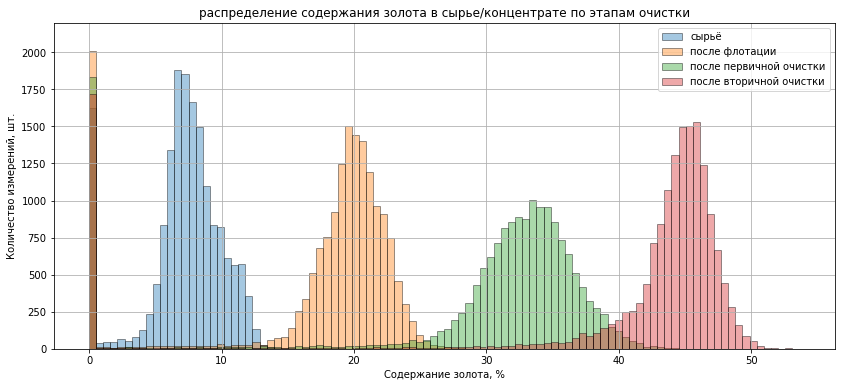

In [24]:
data_train_int[au_con].plot.hist(bins=100, edgecolor = 'black', ylim=(0, 2200), figsize=(14, 6), grid=True, alpha = 0.4)
plt.title('распределение содержания золота в сырье/концентрате по этапам очистки'); 
plt.ylabel('Количество измерений, шт.')
plt.xlabel('Содержание золота, %')
plt.legend(legend);

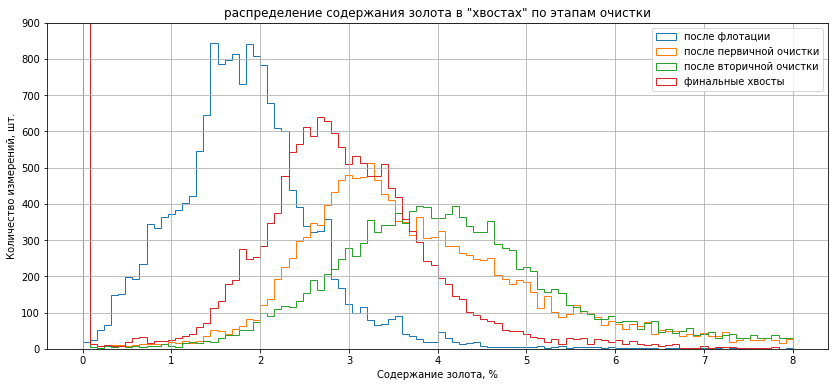

In [25]:
data_train_int[au_tail].plot(
    kind='hist', histtype='step', range=(0, 8), bins=100, ylim=(0, 900), figsize=(14, 6), grid=True)
plt.title('распределение содержания золота в "хвостах" по этапам очистки'); 
plt.ylabel('Количество измерений, шт.')
plt.xlabel('Содержание золота, %')
plt.legend(legend_tail);

In [26]:
display(data_train_int.loc[:, au_tail].sample(10).T)

,4422,13245,5511,8784,4291,7875,12327,3765,5815,9433
0cl_out_tail_au,1.942228,1.229107,2.340626,2.758131,2.041408,1.314213,0.880058,2.070572,1.126244,2.077013
1cl_out_tail_au,5.315449,3.612458,7.432769,0.000000,4.169209,3.623234,3.307579,3.591682,0.000000,2.996555
2cl_out_tail_au,5.837715,4.932608,5.857387,0.000000,4.485944,4.115889,4.930595,3.493340,0.000000,4.530227
final_out_tail_au,3.397705,2.242824,4.638625,0.000000,2.555962,2.511804,2.395597,2.588519,0.000000,3.113340


In [27]:
display(data_train_int[au_tail].mean())

0cl_out_tail_au      1.841012
1cl_out_tail_au      3.577243
2cl_out_tail_au      3.919292
final_out_tail_au    2.677748
dtype: float64

#### Серебро

In [28]:
display(data_train_int.loc[:, ag_con].sample(10).T)

,8745,4515,15701,571,5248,584,16382,579,7792,12855
0cl_in_feed_ag,0.0,10.248085,7.011112,7.202856,10.902107,7.539320,9.579468,7.028660,8.786378,11.560803
0cl_out_con_ag,0.0,14.588197,10.041291,12.134399,13.116654,11.941328,13.437094,11.439199,0.000000,14.187555
1cl_out_con_ag,0.0,9.901842,2.570989,6.804341,10.700237,7.211219,10.391362,7.093680,7.980084,11.069292
final_out_con_ag,0.0,5.820282,3.360278,4.929387,7.048234,5.046043,3.910870,5.202097,5.406896,9.222741


In [29]:
display(data_train_int[ag_con].mean())

0cl_in_feed_ag       7.799291
0cl_out_con_ag      10.535823
1cl_out_con_ag       7.388568
final_out_con_ag     4.699864
dtype: float64

#### Свинец

In [30]:
display(data_train_int.loc[:, pb_con].sample(10).T)

,13506,7339,15852,6048,10013,15417,11598,15995,5585,299
0cl_in_feed_pb,0.01,2.504619,3.290061,3.931889,3.209179,3.085215,0.000000,4.463144,1.661736,3.372971
0cl_out_con_pb,0.01,6.964922,10.225571,8.023506,7.854360,10.461074,0.000000,10.600605,5.507229,7.723799
1cl_out_con_pb,0.01,9.815143,13.713056,11.476950,10.118753,14.183786,11.391515,13.473033,6.519456,8.375980
final_out_con_pb,0.01,9.670406,12.042569,9.999349,10.106512,12.133247,9.718661,9.383790,6.652998,10.450073


In [31]:
display(data_train_int[pb_con].mean())

0cl_in_feed_pb      3.187377
0cl_out_con_pb      6.854436
1cl_out_con_pb      8.506197
final_out_con_pb    9.080430
dtype: float64

Концентрация золота с каждым этапом растет на 10-12%, что на выходе позволяет увеличить его содержание до 40-50%. При этом содержание серебра после флотации немного возрастает, а далее падает, а свинец значительно прибавляет на флотации и немного после 1 и 2 очистки.   
Процентное содержание золота в "хвостах" около 1-5%. Наибольшие потери (относительные) на вторичной очистке.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

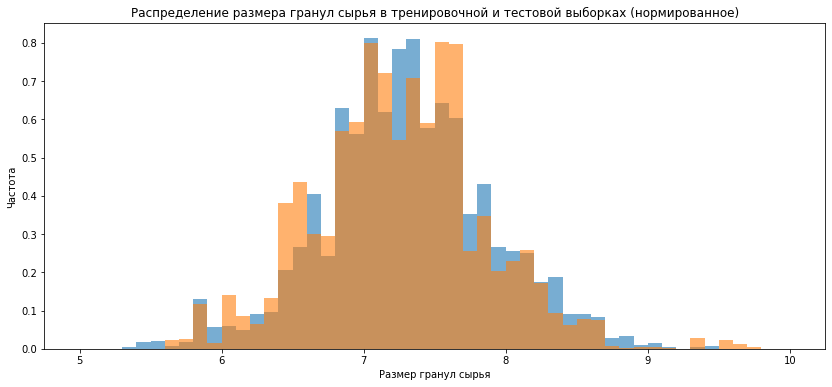

In [32]:
data_train_int['1cl_in_feed_size'].plot.hist(range=(5, 10), bins=50, figsize=(14, 6), density=True, alpha = 0.6)
data_test['1cl_in_feed_size'].plot.hist(range=(5, 10), bins=50, figsize=(14, 6), density=True, alpha = 0.6)
plt.title('Распределение размера гранул сырья в тренировочной и тестовой выборках (нормированное)'); 
plt.ylabel('Частота')
plt.xlabel('Размер гранул сырья');

Распределения схожи. Выборка корректна.

### Исследование суммарных концентраций веществ на разных стадиях

Исследуйте суммарную концентрацию всех веществ на разных
стадиях: в сырье, в черновом и финальном концентратах. Заметили
аномальные значения в суммарном распределении или нет? Если они
есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите
аномалии.

In [33]:
data_train_int['0cl_sum'] = data_train_int['0cl_in_feed_ag']
for col in ['0cl_in_feed_pb', '0cl_in_feed_sol', '0cl_in_feed_au']:
    data_train_int['0cl_sum'] += data_train_int[col]
    
data_train_int['1cl_sum'] = data_train_int['1cl_out_con_ag']
for col in ['1cl_out_con_pb', '1cl_out_con_sol', '1cl_out_con_au']:
    data_train_int['1cl_sum'] += data_train_int[col]

data_train_int['final_sum'] = data_train_int['final_out_con_ag']
for col in ['final_out_con_pb', 'final_out_con_sol', 'final_out_con_au']:
    data_train_int['final_sum'] += data_train_int[col]

sum_con = ['0cl_sum', '1cl_sum', 'final_sum']

In [34]:
data_train_int[sum_con].describe()

,0cl_sum,1cl_sum,final_sum
count,16860.000000,16860.000000,16860.000000
mean,50.437052,53.904050,61.284125
std,18.150602,20.549105,21.669294
min,0.000000,0.000000,0.000000
25%,50.255223,55.023514,66.533865
50%,55.772467,61.075012,68.802985
75%,60.258431,64.859092,70.693809
max,76.024095,76.918076,80.210644


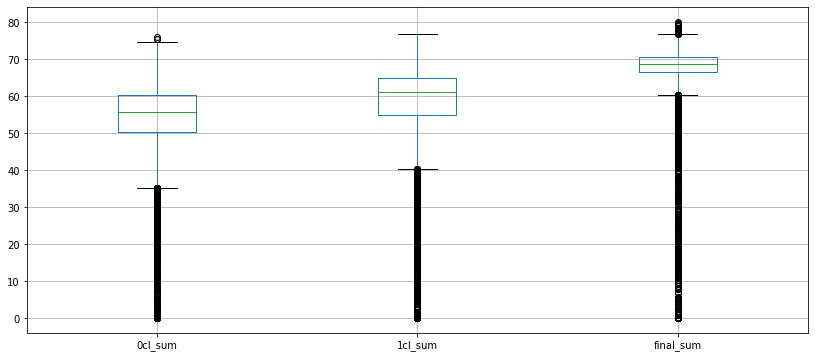

In [35]:
data_train_int[sum_con].boxplot(figsize=(14, 6));

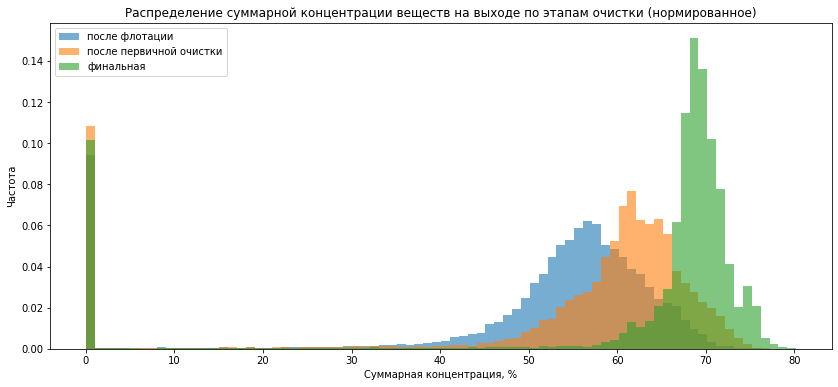

In [36]:
data_train_int[sum_con].plot.hist(bins=80, figsize=(14, 6), alpha = 0.6, density=True)
plt.title('Распределение суммарной концентрации веществ на выходе по этапам очистки (нормированное)'); 
plt.ylabel('Частота')
plt.xlabel('Суммарная концентрация, %')
plt.legend(['после флотации', 'после первичной очистки', 'финальная']);

In [37]:
#data_train_int_min = data_train_int[
#    (data_train_int['0cl_sum']<1) | (data_train_int['1cl_sum']<1) | (data_train_int['final_sum']<1)]
#data_train_int_min[sum_con].plot.hist(bins=80, figsize=(14, 6), alpha = 0.8);

Вероятно суммарные значения концентрации металлов < 0,05 являются выбросами. Также считаю что целевая концентрация (0cl_in_feed_ag, 0cl_out_con_ag, 1cl_out_con_ag, final_out_con_ag) ниже 0,05 (%) является ошибкой оборудования и только внесет "шум" при обучении модели.

## Удаление выбросов
[Таблица имен DataFrame](#DataFrame_names) 

<div class="alert alert-block alert-info">
Модель должна предсказать "кошку/собаку" (данные  обычного технологического процесса). А в обучающей и тестовой выборках попадаются "жирафы" (простой оборудования/ регламентные работы/ выходные и праздники). Цели найти "жирафов" нет - поэтому при обучении и в тесте признаки "жирафов" не нужны!

### В тренировочных данных

#### Не удаляем

In [38]:
data_train_int_nodrop = data_train_int.copy()
data_train_fillna0_nodrop = data_train_fillna0.copy()
data_train_dropNA_nodrop = data_train_dropNA.copy()

#### Удаляем строки с концентрацией < 0.05

<div class="alert alert-block alert-info">
0.05 выбран из-за наличия в данных не толлько 0 но и 0.01

In [39]:
#data_train_int 
#удаляем строки с суммарной концентрацией < 0.05 
con_threshold = 0.05
print(len(data_train_int.index))
data_train_int_drop1 = data_train_int[(data_train_int['0cl_sum']>con_threshold) | 
                                      (data_train_int['1cl_sum']>con_threshold) | 
                                      (data_train_int['final_sum']>con_threshold)]
print(len(data_train_int_drop1.index))

#удаляем строки с концентрацией золота по этапам < 0.05 - не нужно т.к. все такие строки отсеялись в предыдущей ячейке
data_train_int_drop2 = data_train_int_drop1[(data_train_int_drop1['0cl_in_feed_au']>con_threshold) | 
                                            (data_train_int_drop1['0cl_out_con_au']>con_threshold) | 
                                            (data_train_int_drop1['1cl_out_con_au']>con_threshold) | 
                                            (data_train_int_drop1['final_out_con_au']>con_threshold)]
print(len(data_train_int_drop2.index))
print(len(data_train_int_drop2.index)-len(data_train_int.index))

16860
15418
15418
-1442


In [40]:
#data_train_fillna0
#удаляем строки с концентрацией золота по этапам < 0.05 
print(len(data_train_fillna0.index))
data_train_fillna0_drop2 = data_train_fillna0[(data_train_fillna0['0cl_in_feed_au']>con_threshold) | 
                                              (data_train_fillna0['0cl_out_con_au']>con_threshold) | 
                                              (data_train_fillna0['1cl_out_con_au']>con_threshold) | 
                                              (data_train_fillna0['final_out_con_au']>con_threshold)]
print(len(data_train_fillna0_drop2.index))
print(len(data_train_fillna0_drop2.index)-len(data_train_fillna0.index))

16860
15405
-1455


In [41]:
#data_train_dropNA
#удаляем строки с концентрацией золота по этапам < 0.05 
print(len(data_train_dropNA.index))
data_train_dropNA_drop2 = data_train_dropNA[(data_train_dropNA['0cl_in_feed_au']>con_threshold) | 
                                            (data_train_dropNA['0cl_out_con_au']>con_threshold) | 
                                            (data_train_dropNA['1cl_out_con_au']>con_threshold) | 
                                            (data_train_dropNA['final_out_con_au']>con_threshold)]
print(len(data_train_dropNA_drop2.index))
print(data_train_dropNA_drop2['0cl_in_feed_au'].count()-data_train_dropNA['0cl_in_feed_au'].count())

11017
11017
0


In [42]:
#data_test.info()

#### Удаляем строки с концентрацией == 0

### В тестовых данных ????

#### Удаляем NaN

#### Заполняем NaN нулями

#### Удаляем строки с концентрацией во входящем сырье < 0.05 и заполняем NaN интерполяцией

In [43]:
print(len(data_test.index))
data_test_drop = data_test[(data_test['0cl_in_feed_au']>con_threshold) | 
                           (data_test['0cl_in_feed_pb']>con_threshold) |
                           (data_test['0cl_in_feed_ag']>con_threshold) |
                           (data_test['0cl_in_feed_sol']>con_threshold)]
print(len(data_test_drop.index))

5856
5471


In [44]:
data_test_drop.isna().sum().sum()

192

In [45]:
data_test_drop = data_test_drop.interpolate()

На удалении выбросов теряем: 
* тренировочная выборка - 1442 строки (8.5%) (суммарные концентрации и концентрации золота на каждом этапе <= 0.05)
* тестовая выборка - (369) строк (6.6%) (концентрации в cырье <= 0.05) 

192 пропуска в тестовой выборке заполнено интерполяцией

### Выбор и масштабирование признаков

In [46]:
#проиндексируем датой - не понял как обращаться по Datetime индексу
#for df in [data_train_int_drop2, data_test_drop2, data_full]:
#    df.index = df['date']
#    df.index.name = None
#
#target_test = data_full[features_test.index]

In [47]:
#Столбцы признаков
features = data_test_drop.drop(['date'], axis='columns').columns #только столбцы которые есть в тестовой выборке
targets = ['0cl_out_recovery', 'final_out_recovery']

In [48]:
scaler = StandardScaler()
#numeric = list(data_test_drop.drop(['date'], axis='columns').columns)
scaler.fit(data_train_int_drop2[features])

data_train_int_drop2[features] = scaler.transform(data_train_int_drop2[features])
data_test_drop[features] = scaler.transform(data_test_drop[features])

In [49]:
#Разделим тренировочную выборку на features и target
features_train = data_train_int_drop2[features].values
target_train = data_train_int_drop2[targets].values

## Функция для вычисления sMAPE

In [50]:
def smape_calc(targets, predictions):
    
    sm_r = 0
    sm_f = 0
    length = targets.shape[0]
    smape_val = 0
    
    for i in range(length):
        
        rrt = targets[i][0]#recovery rouger target
        rrp = predictions[i][0]#recovery rouger predicted
        sm_r += abs(rrt-rrp)/(abs(rrt)+abs(rrp))
        
        rft = targets[i][1] #recovery final target
        rfp = predictions[i][1] #recovery final predicted
        sm_f += abs(rft-rfp)/(abs(rft)+abs(rfp))
        
        smape_val = (2*0.25*sm_r+2*0.75*sm_f)/length
    return smape_val

## Обучение и проверка моделей
3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией.
Выберите лучшую модель и проверьте её на тестовой выборке. Опишите
выводы.

Вам пригодятся формулы метрик качества: см. пдф или распечатку


In [51]:
N = 5
kfold = KFold(n_splits=N, random_state=123, shuffle=True)
#train_test_indexes = kfold.split(features_train)

### Линейная регрессия

In [52]:
model1 = LinearRegression()
cv_smape = 0

for train_folds_indexes, test_fold_indexes in kfold.split(features_train):
    model1.fit(features_train[train_folds_indexes], target_train[train_folds_indexes])
    predictions_train = model1.predict(features_train[test_fold_indexes])
    sm = smape_calc(target_train[test_fold_indexes], predictions_train)
    cv_smape += sm/N
print(cv_smape)

0.11519261243682183


In [53]:
model2 = LinearRegression()

In [54]:
smape_score = make_scorer(smape_calc, greater_is_better=True)

In [55]:
cv2_smape = cross_val_score(model2, features_train, target_train, cv=kfold, scoring=smape_score)
print(cv2_smape.mean())

0.11519261243682184


### Дерево решений

In [56]:
model3 = DecisionTreeRegressor()

In [57]:
parametrs = { 'max_depth': [2, 3, 4], #, 8, 12, 16
              'min_samples_leaf': [2, 8, 12, 16], #24
              'min_samples_split': [2, 4, 6, 8] }

In [58]:
#import warnings
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings('ignore', category=RuntimeWarning)

In [59]:
grid = GridSearchCV(model3, parametrs, cv=kfold, scoring=smape_score)
grid.fit(features_train, target_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 8, 12, 16],
                         'min_samples_spl

###### Насколько понимаю предупреждение не критическое, но на всякий случай не прячу.

In [60]:
params = grid.best_params_ #{'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 8}
print(params)

{'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 8}


In [61]:
model3 = DecisionTreeRegressor().set_params(**params)
cv3_smape = cross_val_score(model3, features_train, target_train, cv=kfold, scoring=smape_score)
print(cv3_smape.mean())

0.12271777803527747


### Случайный лес

In [62]:
model4 = RandomForestRegressor()

In [63]:
parametrs = { 'max_depth': [2, 3, 4],
              'min_samples_leaf': [8, 12, 16, 20],
              'min_samples_split': [4, 8, 16],
              'n_estimators': [2, 4, 10]}

In [64]:
grid2 = GridSearchCV(model4, parametrs, cv=kfold, scoring=smape_score)
grid2.fit(features_train, target_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=N

In [65]:
params2 = grid2.best_params_ #{'max_depth': 2, 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 4}
print(params2)

{'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 2}


In [66]:
model4 = RandomForestRegressor().set_params(**params2)
cv4_smape = cross_val_score(model4, features_train, target_train, cv=kfold, scoring=smape_score)
print(cv4_smape.mean())

0.12272362318222804


### DummyRegressor

In [67]:
model5 = DummyRegressor(strategy='median').fit(features_train, target_train)
cv5_smape = cross_val_score(model5, features_train, target_train, cv=kfold, scoring=smape_score)
print(cv5_smape.mean())

0.1296145100266361


### Сравнение моделей

In [68]:
print('Модель: model2 (линейная регрессия), итоговое sMAPE: %.3f' %(cv2_smape.mean()))
print('Модель: model3 (дерево решений), итоговое sMAPE: %.3f' %cv3_smape.mean())
print('                лучшие параметры:', params)
print('Модель: model4 (случайный лес), итоговое sMAPE: %.3f' %cv4_smape.mean())
print('                лучшие параметры:', params2)
print('Модель: model5 (DummyRegressor), итоговое sMAPE: %.3f' %cv5_smape.mean())

Модель: model2 (линейная регрессия), итоговое sMAPE: 0.115
Модель: model3 (дерево решений), итоговое sMAPE: 0.123
                лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 8}
Модель: model4 (случайный лес), итоговое sMAPE: 0.123
                лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 2}
Модель: model5 (DummyRegressor), итоговое sMAPE: 0.130


Показатели до масштабирования:
* Модель: model2 (линейная регрессия), итоговое sMAPE: 0.115  
* Модель: model3 (дерево решений), итоговое sMAPE: 0.123  
                  лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 24, 'min_samples_split': 8}
* Модель: model4 (случайный лес), итоговое sMAPE: 0.121  
                  лучшие параметры: {'max_depth': 2, 'min_samples_leaf': 32, 'min_samples_split': 16, 'n_estimators': 4}

Наилучшее значение sMAPE (11,5%) у линейной регресии. Результаты "дерева" и "леса" - 12,3% и 12,1% соответственно. При предсказании медианного значения метрика незначительно хуже - 13,0%. Вероятно можно добиться лучших показателей для "деревянных" моделей более глубоким перебором гиперпараметров, но это требует более серьезных вычислительных мощностей. Также прирост метрики возможен за счет более качественной предобработки, но необходимо более серьезное понимание технологического процесса (взаимодействие с техническими специалистами заказчика). Масштабирование признаков прироста не дало.

## Проверка на тестовой выборке

In [69]:
#data_test_drop.info()

In [70]:
data_test_drop_merge = data_test_drop.merge(
    data_full[['date', '0cl_out_recovery', 'final_out_recovery']], on='date', how='left')

In [71]:
#data_test_drop_merge.isna().sum()

Из data_full в data_test_drop_merge попали пропуски (в целевых столбцах). Взять их значения негде (заполнять интерполяцией или другим способом - не правильно) поэтому удаляем.

In [72]:
print(data_test_drop_merge['date'].count())
data_test_drop_merge_drop = data_test_drop_merge.dropna()
print(data_test_drop_merge_drop['date'].count())

5471
5290


Удаляем еще 181 строку (3,1% от первоначального количества).

In [73]:
features_test = data_test_drop_merge_drop[features].values
target_test = data_test_drop_merge_drop[targets].values

In [74]:
predictions_test = model1.predict(features_test)
test_sMAPE = smape_calc(target_test, predictions_test)
print('Модель: model1 (линейная регрессия), итоговое sMAPE на тестовой выборке: %.3f' %test_sMAPE)

Модель: model1 (линейная регрессия), итоговое sMAPE на тестовой выборке: 0.102


In [75]:
cv7_smape = cross_val_score(model5, features_test, target_test, cv=5, scoring=smape_score)
print(cv7_smape.mean())

0.09151913059672938


## Выводы

<div class="alert alert-block alert-info">
На прербор всех вариантов очистки тренироочных/тестовых данных не хватило задора. Надеюсь что цели проекта "закрыты"! 

Линейная регрессия позволила получить итоговое sMAPE на тестовой выборке равное 10,2%, при этом DummyRegressor предсказывает лучше. Для улучшения метрики моделей необходимо рассмотреть следующие действия: 
* выбор оптимального варианта очистки тренироочных/тестовых данных
* построение отдельных предсказательных моделей для rouger output recovery и final output recovery 
* работа с признаками (выбор наиболее значимых признаков, очистка от выбросов) для каждой модели
* более серьезная работа с гиперпараметрами "деревянных" моделей